In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("data/Used_Bikes.csv")

In [3]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
data.tail()

,bike_name,price,city,kms_driven,owner,age,power,brand
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero
32647,Bajaj Pulsar 150cc,22000.0,Pune,60857.0,First Owner,13.0,150.0,Bajaj


In [5]:
#checking null value
data.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [6]:
#checking duplicates value
data.duplicated().sum()

25324

In [7]:
#drop duplicated value
data.drop_duplicates(inplace=True)

In [8]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   object 
 1   price       7324 non-null   float64
 2   city        7324 non-null   object 
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   object 
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   object 
dtypes: float64(4), object(4)
memory usage: 515.0+ KB


In [9]:
data.shape

(7324, 8)

In [10]:
data.count()

bike_name     7324
price         7324
city          7324
kms_driven    7324
owner         7324
age           7324
power         7324
brand         7324
dtype: int64

Segregate numerical and categorical coloumns

In [11]:
numerical_columns = data.columns[data.dtypes != 'object']
categorical_columns = data.columns[data.dtypes == 'object']


In [12]:
print("Categorical feature are : ",categorical_columns)
print("numerical_feature are :",numerical_columns)

Categorical feature are :  Index(['bike_name', 'city', 'owner', 'brand'], dtype='object')
numerical_feature are : Index(['price', 'kms_driven', 'age', 'power'], dtype='object')


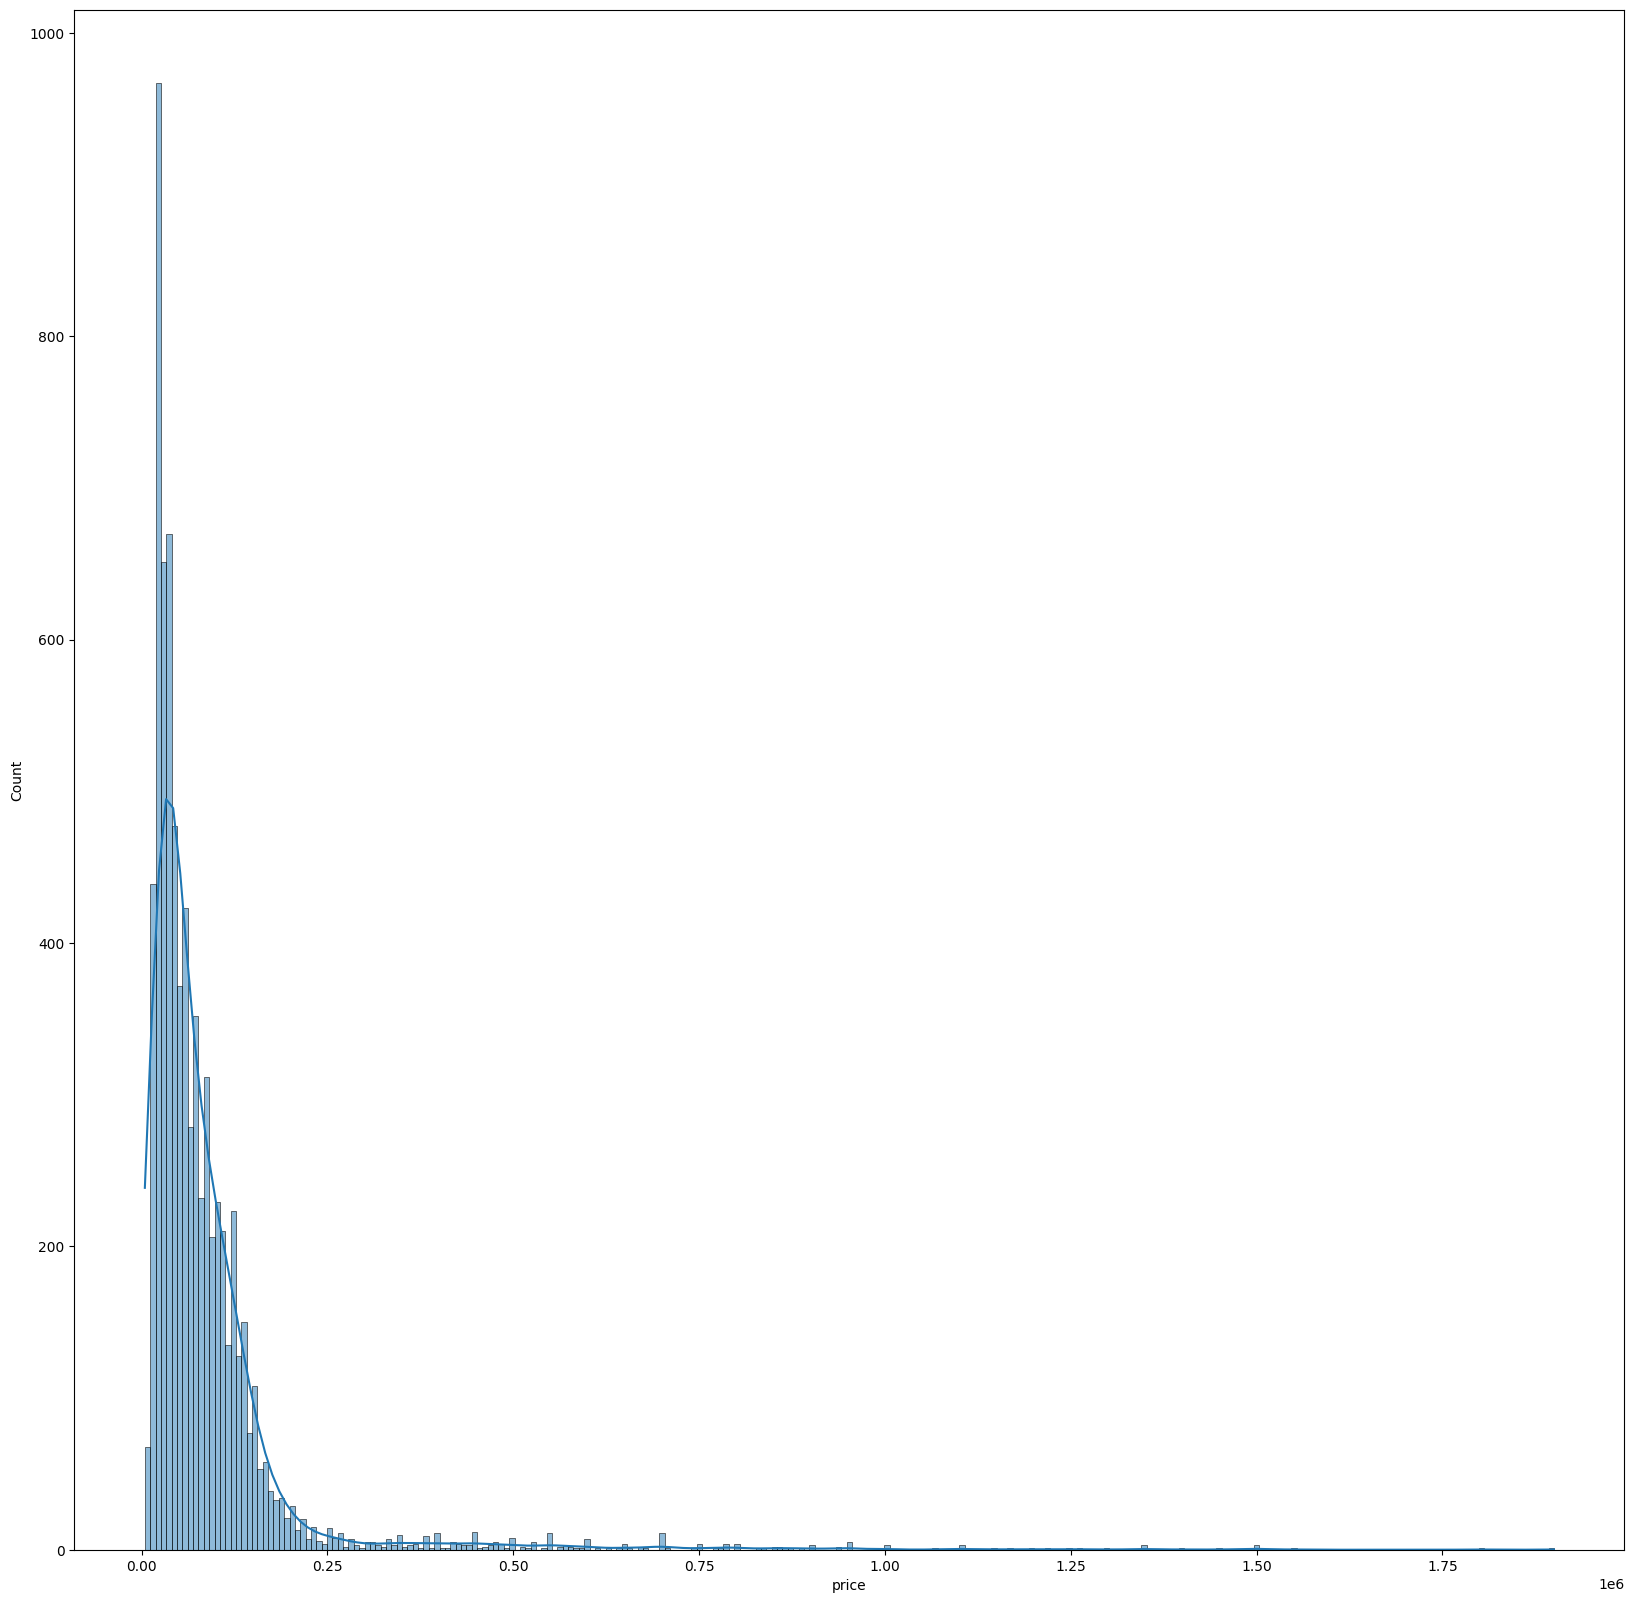

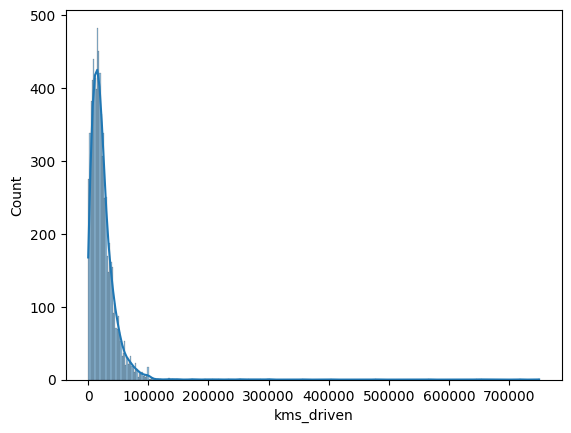

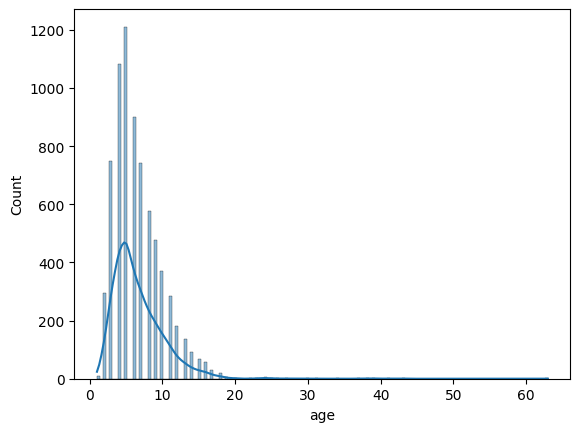

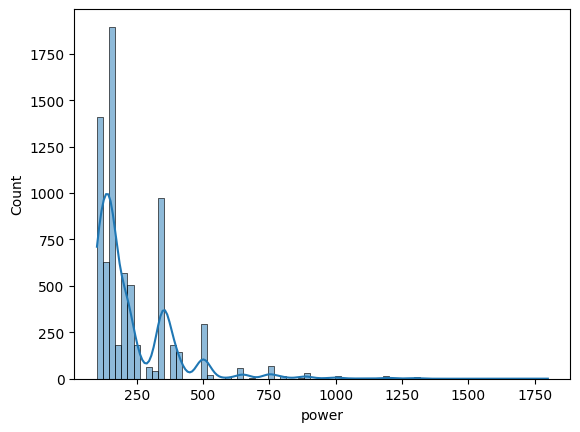

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
x=1
for i in numerical_columns:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

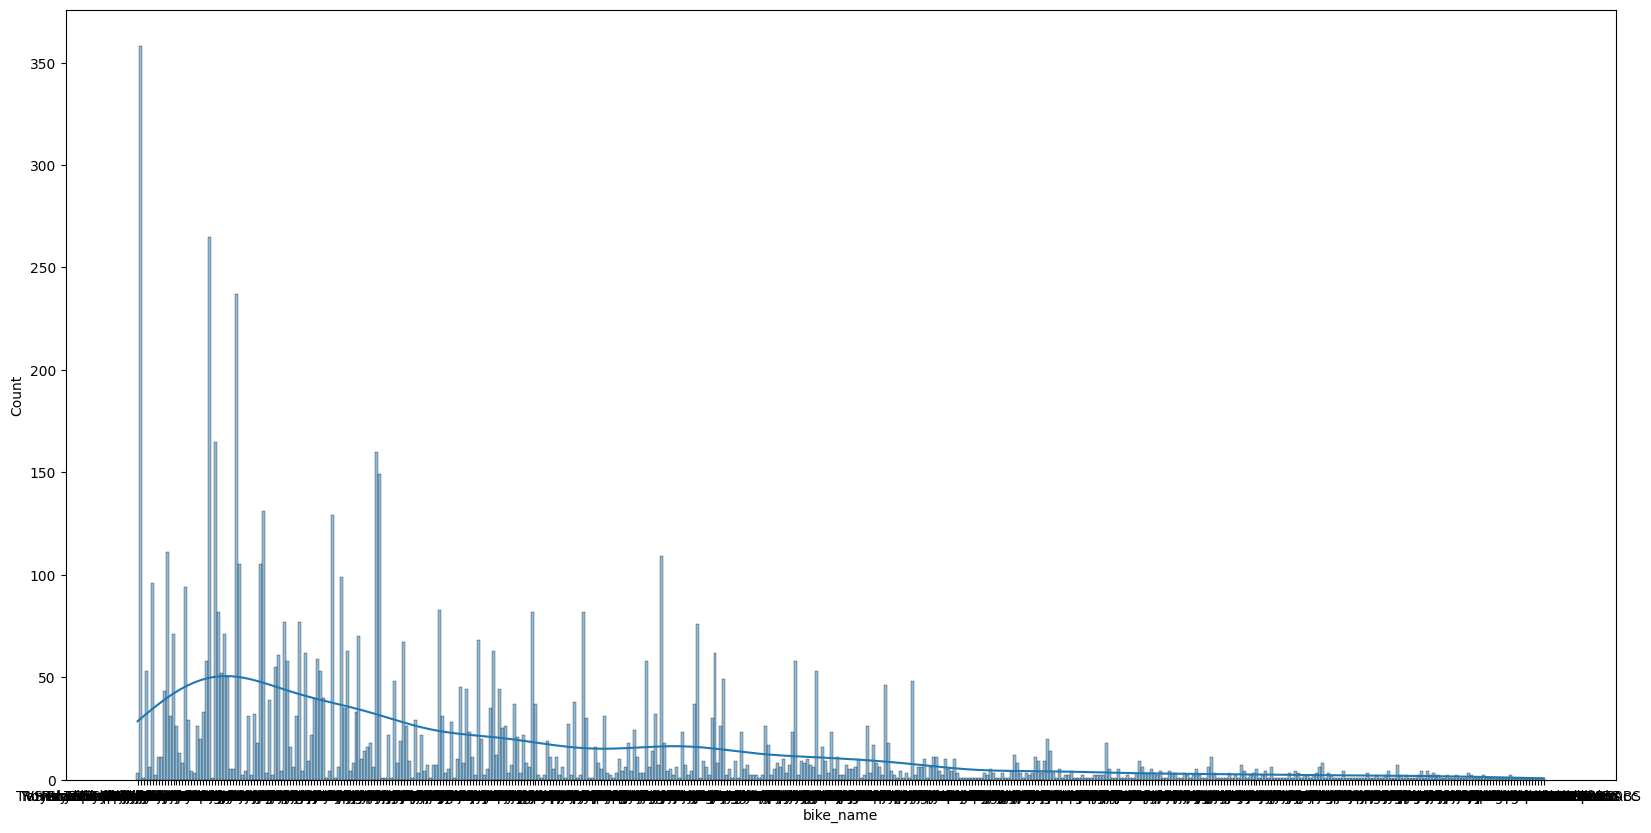

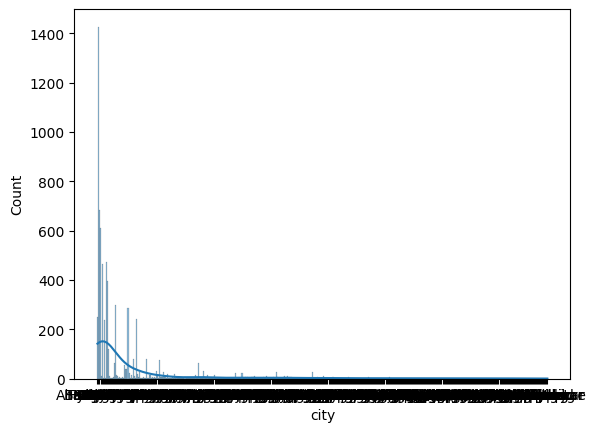

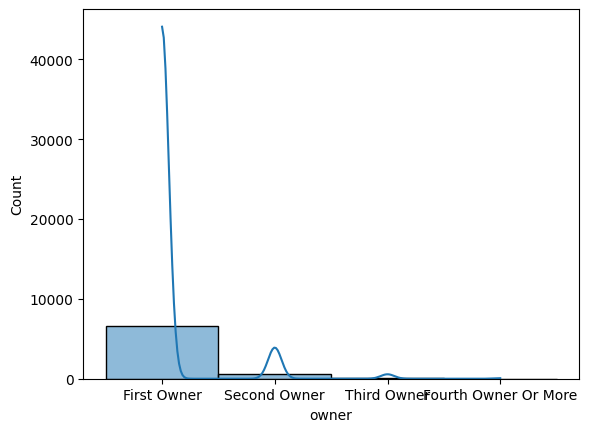

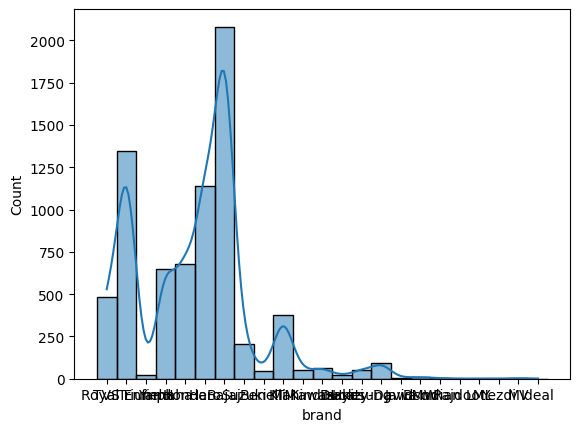

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x=1
for i in categorical_columns:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

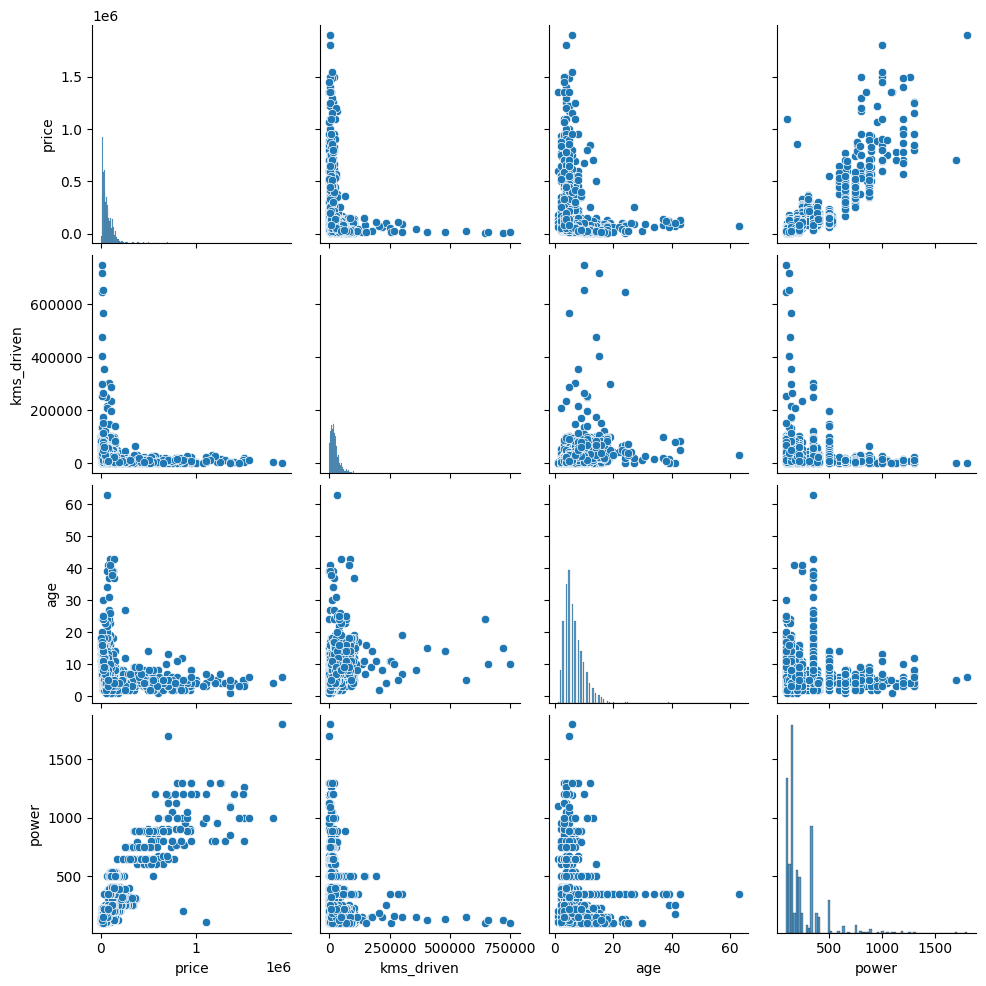

In [15]:
sns.pairplot(data)

In [16]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [17]:
data['bike_name'].unique()

array(['TVS Star City Plus Dual Tone 110cc',
       'Royal Enfield Classic 350cc', 'Triumph Daytona 675R',
       'TVS Apache RTR 180cc', 'Yamaha FZ S V 2.0 150cc-Ltd. Edition',
       'Yamaha FZs 150cc', 'Honda CB Hornet 160R  ABS DLX',
       'Hero Splendor Plus Self Alloy 100cc',
       'Royal Enfield Thunderbird X 350cc',
       'Royal Enfield Classic Desert Storm 500cc',
       'Yamaha YZF-R15 2.0 150cc', 'Yamaha FZ25 250cc',
       'Bajaj Pulsar NS200', 'Bajaj Discover 100M', 'Bajaj Discover 125M',
       'Bajaj Pulsar NS200 ABS', 'Bajaj Pulsar RS200 ABS',
       'Suzuki Gixxer SF 150cc', 'Benelli 302R 300CC',
       'Hero Splendor iSmart Plus IBS 110cc',
       'Royal Enfield Classic Chrome 500cc', 'Yamaha FZ V 2.0 150cc',
       'Hero Super Splendor 125cc', 'Honda CBF Stunner 125cc',
       'Bajaj Pulsar 150cc', 'Honda X-Blade 160CC ABS',
       'Bajaj Avenger 220cc', 'KTM RC 390cc', 'Honda CB Unicorn 150cc',
       'KTM Duke 200cc', 'Honda CBR 150R 150cc',
       'Royal Enfiel

In [18]:
data['city'].unique()

array(['Ahmedabad', 'Delhi', 'Bangalore', 'Mumbai', 'Kalyan', 'Faridabad',
       'Mettur', 'Hyderabad', 'Kaithal', 'Gurgaon', 'Pune', 'Noida',
       'Nashik', 'Kochi', 'Allahabad', 'Samastipur', 'Nadiad', 'Lucknow',
       'Jaipur', 'Karnal', 'Gorakhpur', 'Vidisha', 'Hosur', 'Bagalkot',
       'Baripara', 'Agra', 'Dharwad', 'Vadodara', 'Jalandhar', 'Surat',
       'Chennai', 'Navi Mumbai', 'Gandhidham', 'Visakhapatnam',
       'Thrissur', 'Kolkata', 'Ernakulam', 'Barasat', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Bhopal', 'Hamirpur(hp)', 'Kottayam',
       'Arrah', 'Patiala', 'Ranga Reddy', 'Mandi', 'Ludhiana', 'Mandya',
       'Siliguri', 'Aurangabad', 'Kanpur', 'Bhilwara', 'Meerut', 'Rewari',
       'Ahmednagar', 'Wardha', 'Chandigarh', 'Ranchi', 'Panvel', 'Thane',
       'Jabalpur', 'Kota', 'Rohtak', 'Rajkot', 'Varanasi', '24 Pargana',
       'Banka', 'Nagpur', 'Banki', 'Pali', 'Chhatarpur', 'Katihar',
       'Mohali', 'Rudrapur', 'Coimbatore', 'Jajpur', 'Mysore', 'Adoni',

In [19]:
top_ten_expensive_bike = data.groupby("bike_name")["price"].mean().sort_values(ascending=True).reset_index().head(10)
top_ten_expensive_bike


,bike_name,price
0,LML Freedom DX 110cc,4400.0
1,Hero Ambition 135cc,5000.0
2,Hero Honda Ambition 135cc,7500.0
3,Suzuki Heat 125cc,8000.0
4,TVS Star 100cc,9000.0
5,TVS Fiero 150cc,12000.0
6,Bajaj XCD 125,13000.0
7,TVS Flame 125cc,13600.0
8,Bajaj Boxer CT100,14500.0
9,Hero Splendor Plus 100 cc,15000.0


<Axes: xlabel='bike_name', ylabel='price'>

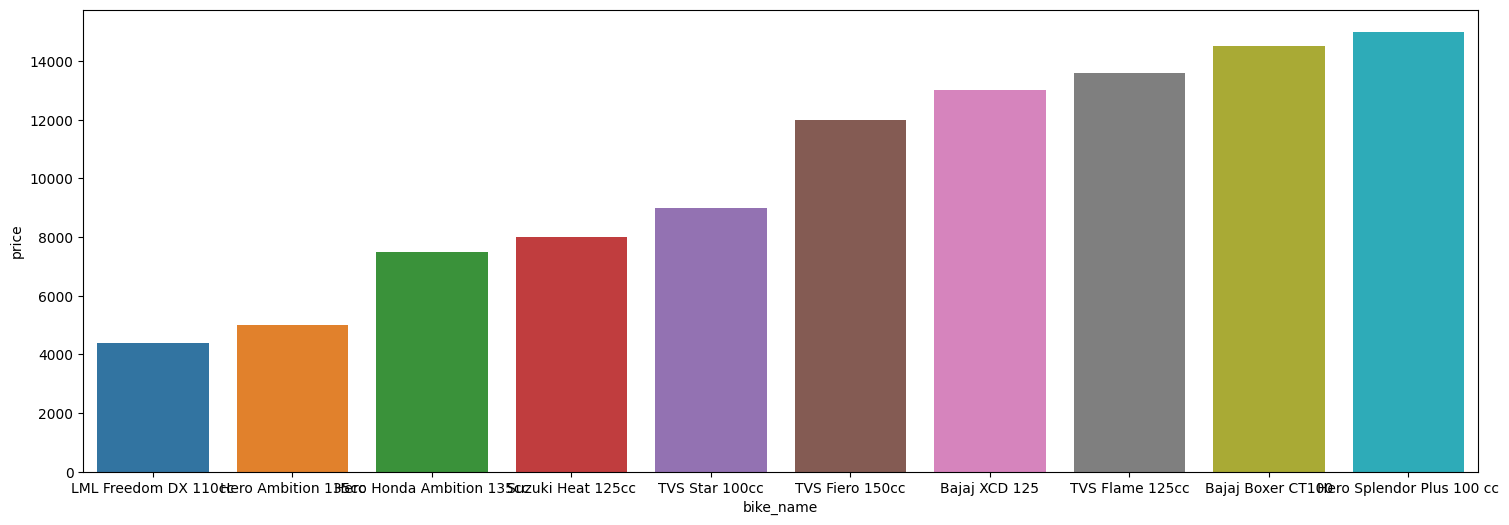

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(x="bike_name",y="price",data=top_ten_expensive_bike)

In [21]:
price_with_age = data.groupby("price")["age"].mean().sort_index(ascending=True).reset_index().head(5)
price_with_age

,price,age
0,4400.0,16.0
1,5000.0,18.0
2,5800.0,13.0
3,6400.0,18.0
4,6700.0,17.0


<Axes: xlabel='price', ylabel='age'>

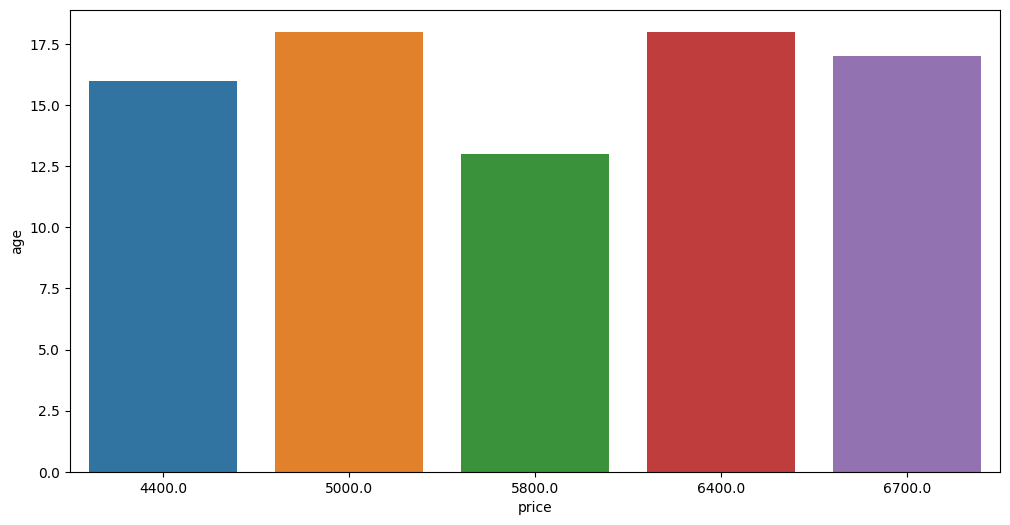

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="price",y="age",data=price_with_age)

In [23]:
city_with_prices = data.groupby("city")["price"].mean().sort_index(ascending=False).reset_index().head(5)
city_with_prices


,city,price
0,Zirakpur,72000.000000
1,Yemmiganur,47000.000000
2,Yamuna Nagar,50000.000000
3,Wardha,55999.666667
4,Warangal,102500.000000


<Axes: xlabel='city', ylabel='price'>

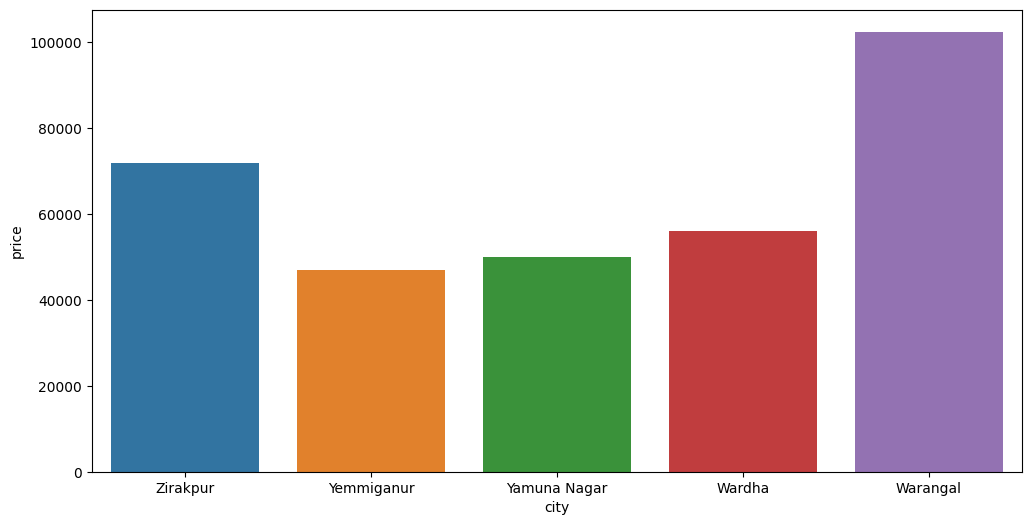

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x="city",y="price",data=city_with_prices)


In [25]:
brand_with_price = data.groupby("brand")["price"].mean().reset_index().head(10)
brand_with_price

,brand,price
0,BMW,6.735000e+05
1,Bajaj,4.903128e+04
2,Benelli,2.983761e+05
3,Ducati,9.005750e+05
4,Harley-Davidson,4.734291e+05
5,Hero,3.068307e+04
6,Honda,5.147068e+04
7,Hyosung,2.432084e+05
8,Ideal,1.000000e+05
9,Indian,1.100000e+06


<Axes: xlabel='brand', ylabel='price'>

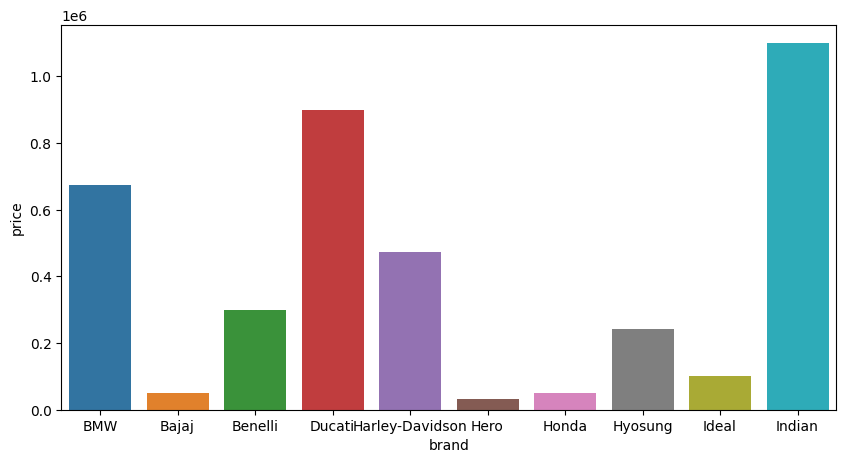

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x="brand",y="price",data=brand_with_price)


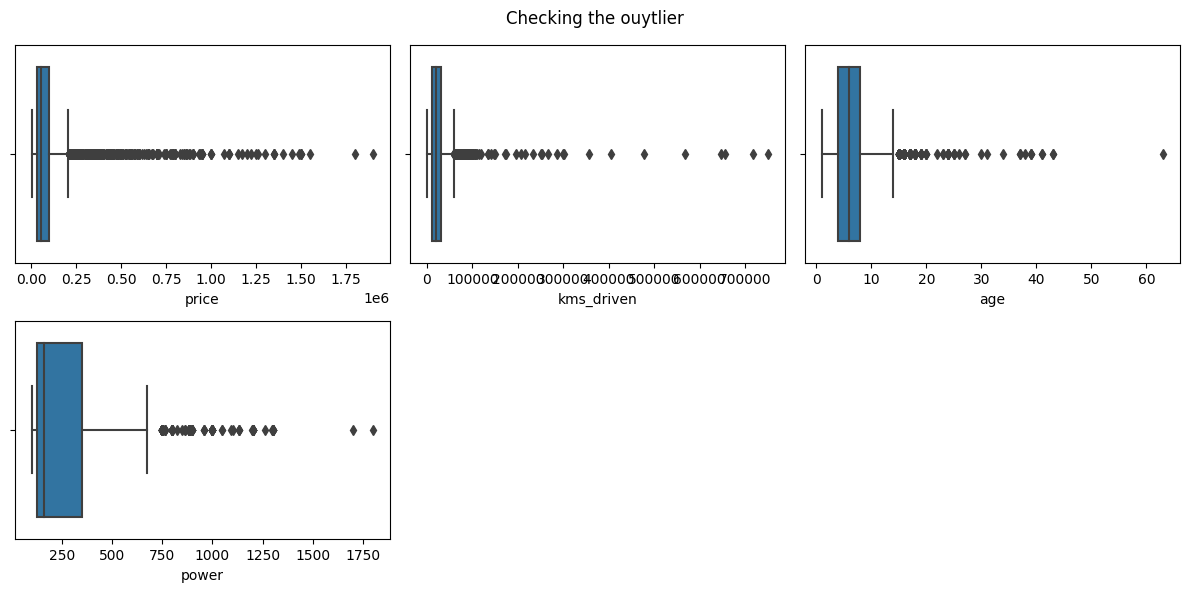

In [27]:

plt.figure(figsize=(12,6))
plt.suptitle("Checking the ouytlier")
for i in range(0,len(numerical_columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=data[numerical_columns[i]])
    plt.tight_layout()

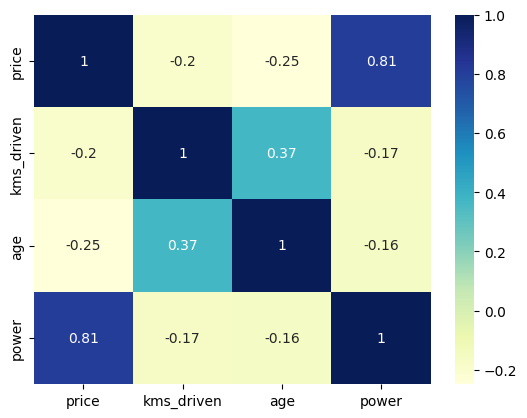

In [28]:
sns.heatmap(data.corr(numeric_only=True),cmap='YlGnBu',annot=True)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

In [30]:

# changing the categorical value into numerical
cate_to_num=["owner","brand"]
for i in cate_to_num:
    data[i] = lable.fit_transform(data[i])


Model training

In [31]:
x = data.drop("price",axis=1)
y = data["price"] 

In [34]:
# after using label encoder recyling the categorical and numerical columns

categorical_columns_x = x.select_dtypes(include="object").columns
numerical_columns_x = x.select_dtypes(exclude="object").columns

In [35]:
print("categorical_columns_x",categorical_columns_x)
print("numerical_columns_x",numerical_columns_x)

categorical_columns_x Index(['bike_name', 'city'], dtype='object')
numerical_columns_x Index(['kms_driven', 'owner', 'age', 'power', 'brand'], dtype='object')


In [36]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
numerical_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("scaler",StandardScaler(with_mean=False)),
    ]
)

# Create Preprocess object
preprocessing = ColumnTransformer([
    ("numerical_pipeline",numerical_pipeline,numerical_columns_x),
    ("categorical_pipeline",categorical_pipeline,categorical_columns_x)
])

In [40]:
# Train rest split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [41]:
# Transform
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

In [42]:
from sklearn.linear_model import  LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [44]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    #"XGBRegressor":XGBRegressor()
    
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    # Make Prediction
    y_predict = model.predict(x_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 8.124252084372304e+36
MAE 1.5224490868523853e+18
RMSE 2.85030736664878e+19
R2 -4.1729776474282665e+26
Ridge
Model Traning Performance
MSE 537755788581.35974
MAE 1830554.5119785108
RMSE 7333183.405461504
R2 72.37846804579361
Lesso
Model Traning Performance
MSE 321401343628.36115
MAE 1652176.376818984
RMSE 5669226.963425976
R2 83.49139577544034
Elastic
Model Traning Performance
MSE 662887373128.7156
MAE 2287179.2693111748
RMSE 8141789.56451661
R2 65.95115264641257
LinearSVR
Model Traning Performance
MSE 2462762130808.594
MAE 7213001.778169437
RMSE 15693190.022454306
R2 -26.49842983781687
DecisionTreeRegressor
Model Traning Performance
MSE 452664367068.00336
MAE 1804225.6313993174
RMSE 6728033.643405802
R2 76.74914237095602
RandomForestRegressor
Model Traning Performance
MSE 244311349525.91492
MAE 1370189.4972891272
RMSE 4942786.15282833
R2 87.45108115803319


In [45]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "Elastic":ElasticNet(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    #"XGBRegressor":XGBRegressor()
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []
testing_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    # Make Prediction
    y_predict = model.predict(x_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("Traning_scor",trainig_score)
    print("Testing_score",testing_score)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)
    testing_score.append(test_score)

LinearRegression
Model Traning Performance
MSE 8.124252084372304e+36
MAE 1.5224490868523853e+18
RMSE 2.85030736664878e+19
R2 -4.1729776474282665e+26
Traning_scor []
Testing_score []
Ridge
Model Traning Performance
MSE 537755788581.35974
MAE 1830554.5119785108
RMSE 7333183.405461504
R2 72.37846804579361
Traning_scor [0.9647594200308649]
Testing_score [-4.172977647428266e+24]
Lasso
Model Traning Performance
MSE 321401343628.36115
MAE 1652176.376818984
RMSE 5669226.963425976
R2 83.49139577544034
Traning_scor [0.9647594200308649, 0.9649093887699798]
Testing_score [-4.172977647428266e+24, 0.7237846804579361]
Elastic
Model Traning Performance
MSE 662887373128.7156
MAE 2287179.2693111748
RMSE 8141789.56451661
R2 65.95115264641257
Traning_scor [0.9647594200308649, 0.9649093887699798, 0.9649093329499293]
Testing_score [-4.172977647428266e+24, 0.7237846804579361, 0.8349139577544034]
LinearSVR
Model Traning Performance
MSE 2462764801717.939
MAE 7212809.637675682
RMSE 15693198.532223884
R2 -26.498

In [46]:
trainig_score

[0.9647594200308649,
 0.9649093887699798,
 0.9649093329499293,
 0.9056936458392089,
 -0.32169923690097635,
 0.9988027852721549,
 0.986606202473446]

In [47]:
testing_score

[-4.172977647428266e+24,
 0.7237846804579361,
 0.8349139577544034,
 0.6595115264641257,
 -0.26498567027614484,
 0.801840918569769,
 0.8680325102757205]

data.to_csv("Clean_Bike_Price_Data.csv",index=False)